### Student Information
Name:林柏全
Student ID:110137501
GitHub ID:bartonlin

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh

In [2]:
def add_data(sentences,labels,category,PATH,choose=0):
    file = open(PATH, 'r', encoding="utf-8")
    for line in file:
        line = line.strip()
        ss = line.split('\t')
        sentences.append(ss[0])
        labels.append(ss[1])
        if choose == 0:
            category.append('amazon')
        elif choose == 1:
            category.append('imdb')
        else:
            category.append('yelp')
    return sentences,labels,category

# data files path
data1 = 'sentiment labelled sentences/amazon_cells_labelled.txt'
data2 = 'sentiment labelled sentences/imdb_labelled.txt'
data3 = 'sentiment labelled sentences/yelp_labelled.txt'

# read data
sentences = []
labels = []
category = []
sentences,labels,category = add_data(sentences,labels,category,data1,0)
sentences,labels,category = add_data(sentences,labels,category,data2,1)
sentences,labels,category = add_data(sentences,labels,category,data3,2)

# get pandas.dataframe
Combined = [sentences, labels, category]
Combined = np.array(Combined).T
df = pd.DataFrame(Combined, columns=['Sentences', 'Labels','category'])

X = df
df.head()

,Sentences,Labels,category
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon


In [3]:
# Missing Values
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,Sentences,Labels,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [4]:
# Duplicate Data
sum(X.duplicated())

17

In [5]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [6]:
len(X)

2966

In [7]:
# Sample
import matplotlib.pyplot as plt
%matplotlib inline

0    1486
1    1480
Name: Labels, dtype: int64


<AxesSubplot:title={'center':'label distribution'}>

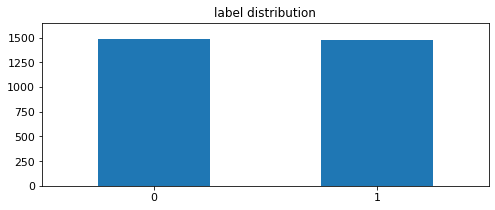

In [8]:
print(X.Labels.value_counts())

# plot barchart for X_sample
X.Labels.value_counts().plot(kind = 'bar',
                                    title = 'label distribution',
                                    ylim = [0, 1650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

1    507
0    493
Name: Labels, dtype: int64
0    1486
1    1480
Name: Labels, dtype: int64


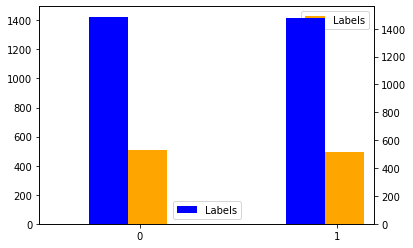

In [9]:
X_sample = X.sample(n=1000) #random state
# Answer here
upper_bound = (max(X.Labels.value_counts()) / 10 + 1) * 10
print(X_sample.Labels.value_counts())
print(X.Labels.value_counts())

# plot barchart for X_sample
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.2

X_sample.Labels.value_counts().plot(kind='bar', color='orange', ax=ax, ylim=[0,upper_bound], rot=0, width=width, position=0.3, legend='w0')
X.Labels.value_counts().plot(kind='bar', color='blue', ax=ax2, rot=0, width=width, position=1.3, legend=True)

ax.set_label('category_name')
ax2.set_label('category_name')
plt.show()

In [10]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.Sentences)

In [12]:
count_vect.get_feature_names()[::500][0:10]

d:\desktop\dm_lab01\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 'blandest',
 'contrast',
 'elsewhere',
 'gosh',
 'keep',
 'navigate',
 'promise',
 'seuss',
 'teeth']

In [13]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

In [14]:
analyze(X.Sentences[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

d:\desktop\dm_lab01\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


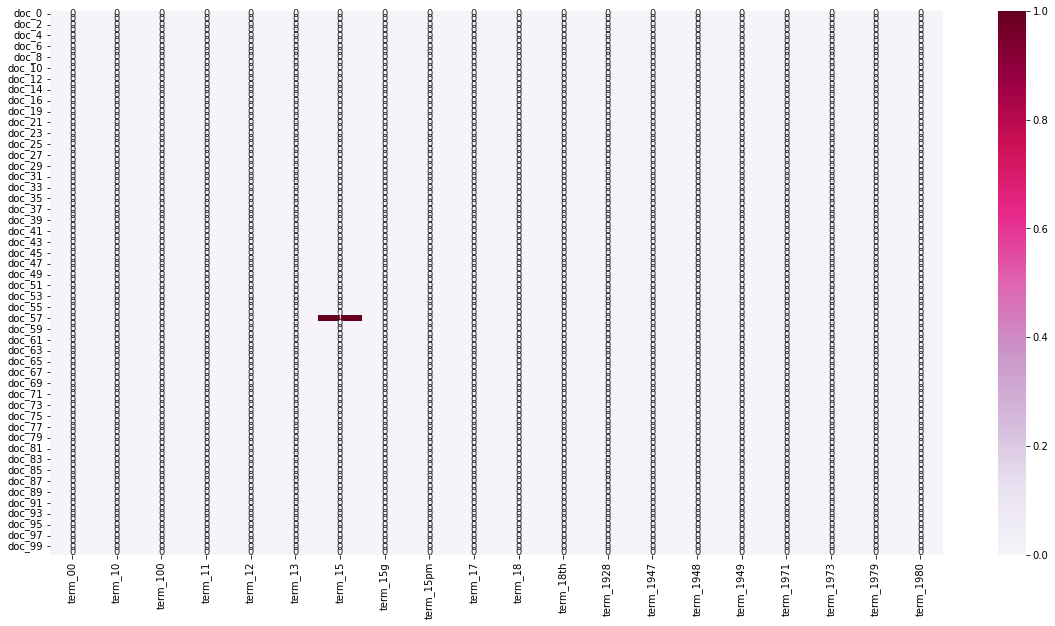

In [15]:
import seaborn as sns

# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]
plot_z = X_counts[0:100, 0:20].toarray()


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [16]:
from sklearn.decomposition import PCA
#Dimensionality Reduction
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print("reduced shape: "+str(X_reduced.shape))

reduced shape: (2966, 2)


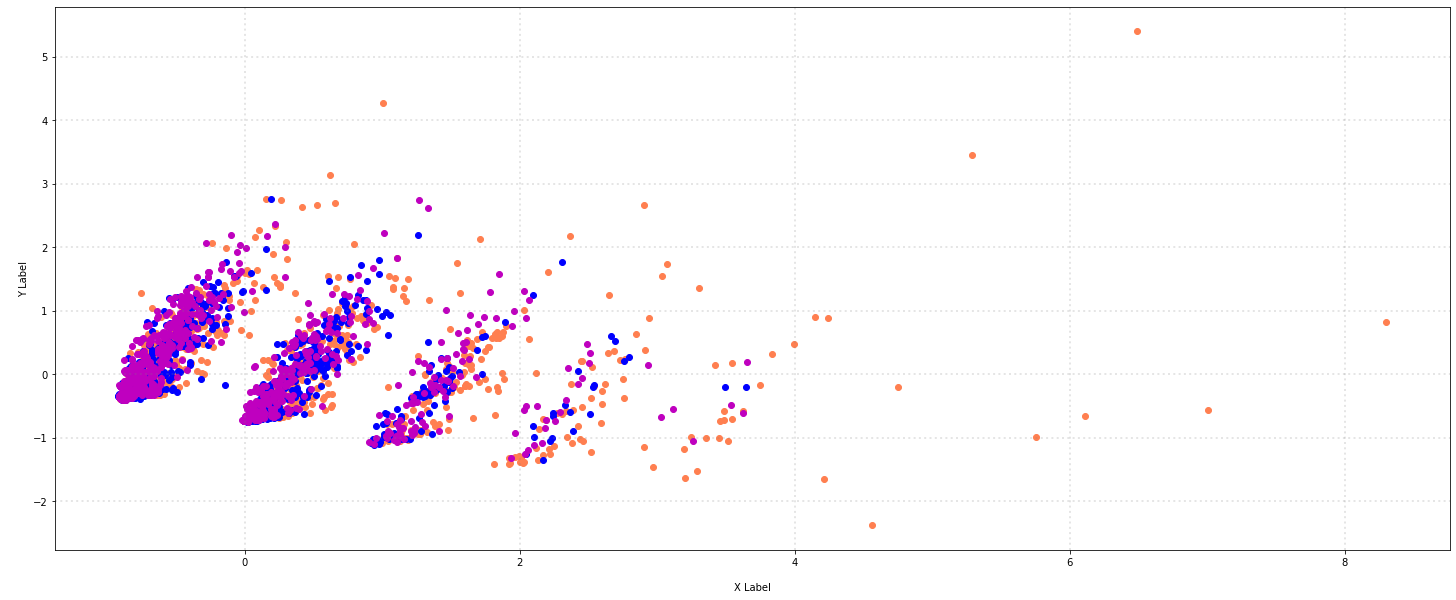

In [17]:
#plot scatter
col = ['coral', 'blue', 'm']
categories = ['imdb', 'yelp', 'amazon']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for col_index, cate in zip(col, categories):
    xs = X_reduced[X['category'] == cate].T[0]
    ys = X_reduced[X['category'] == cate].T[1]
    ax.scatter(xs, ys, c = col_index, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

C:\Users\BARTON~1\AppData\Local\Temp/ipykernel_6228/2067495742.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


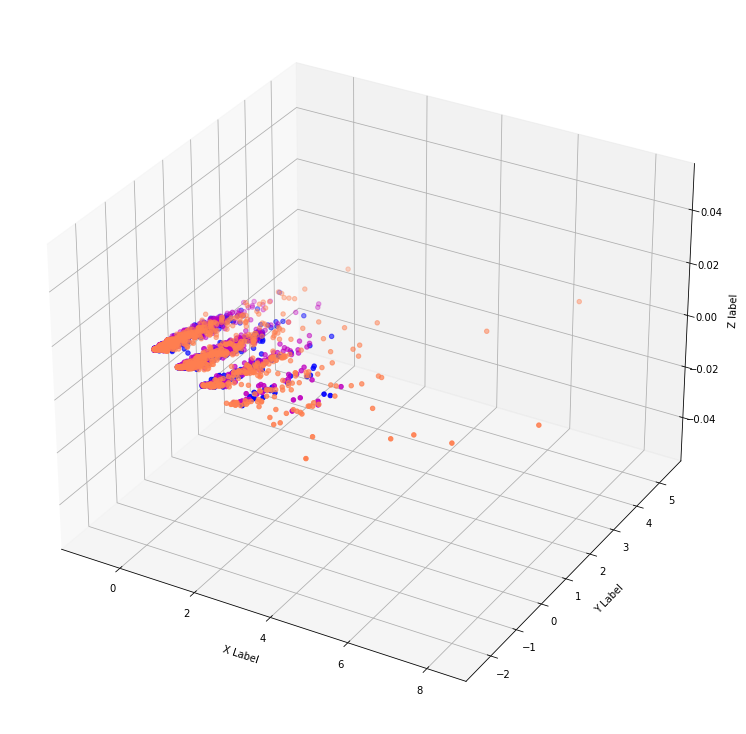

In [18]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
X_reduced2 = PCA(n_components = 3).fit_transform(X_counts.toarray())

col2 = ['coral', 'blue', 'black', 'm']
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced2[X['category'] == category].T[0]
    ys = X_reduced2[X['category'] == category].T[1]
    zs = X_reduced2[X['category'] == category].T[2]
    
    ax.scatter(xs, ys, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ label')
plt.show()

In [19]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [20]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [21]:
term_frequencies[0]

1

d:\desktop\dm_lab01\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\desktop\dm_lab01\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


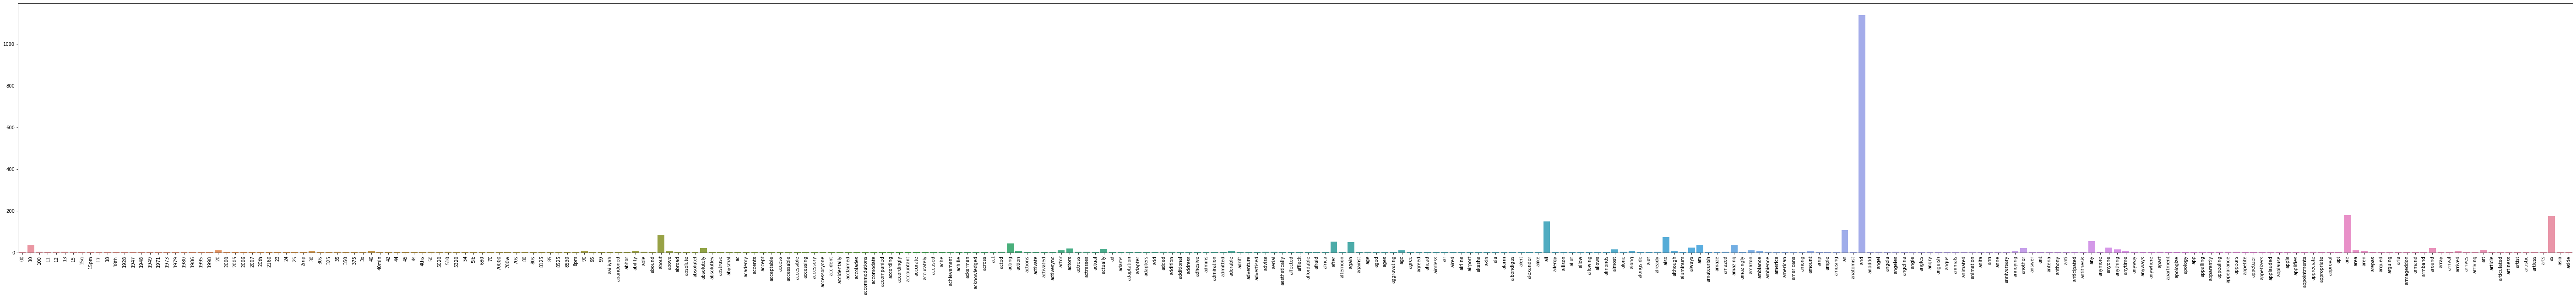

In [22]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

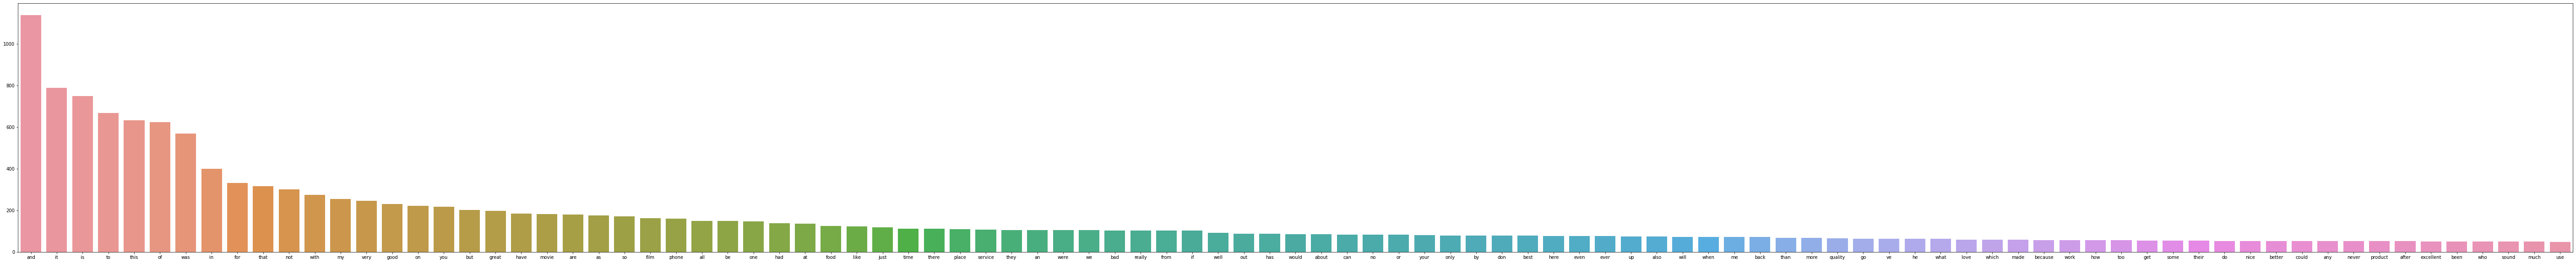

In [23]:
#long tail
index = np.argsort(-term_frequencies)

feature_name = np.asarray(count_vect.get_feature_names())

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=feature_name[index[1:100]], 
            y=term_frequencies[index[1:100]])

In [24]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

d:\desktop\dm_lab01\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\desktop\dm_lab01\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


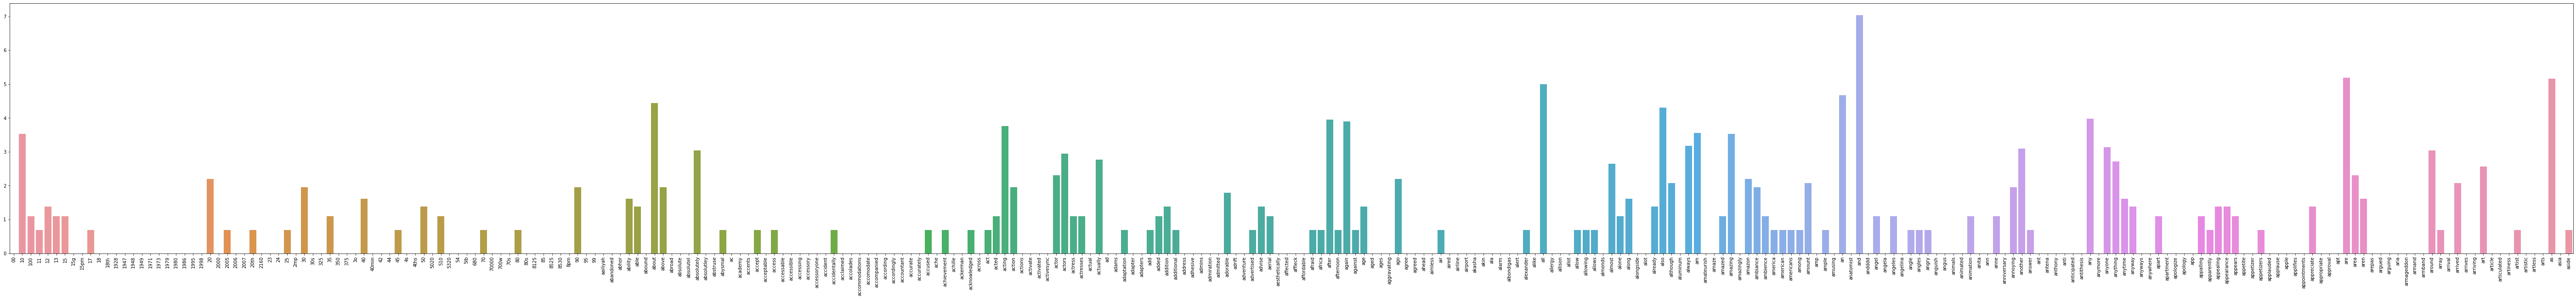

In [25]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [26]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [27]:
mlb.fit(X.category)

LabelBinarizer()

In [28]:
mlb.classes_

array(['amazon', 'imdb', 'yelp'], dtype='<U6')

In [29]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [30]:
X[0:9]

,Sentences,Labels,category,bin_category
0,So there is no way for me to plug it in here i...,0,amazon,"[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,"[1, 0, 0]"
2,Great for the jawbone.,1,amazon,"[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,"[1, 0, 0]"
4,The mic is great.,1,amazon,"[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon,"[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon,"[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon,"[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon,"[1, 0, 0]"


In [31]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category']).tolist()
X[0:9]

,Sentences,Labels,category,bin_category,bin_category_name
0,So there is no way for me to plug it in here i...,0,amazon,"[1, 0, 0]","[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,"[1, 0, 0]","[1, 0, 0]"
2,Great for the jawbone.,1,amazon,"[1, 0, 0]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,"[1, 0, 0]","[1, 0, 0]"
4,The mic is great.,1,amazon,"[1, 0, 0]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon,"[1, 0, 0]","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon,"[1, 0, 0]","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon,"[1, 0, 0]","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon,"[1, 0, 0]","[1, 0, 0]"


In [32]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['Sentences']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['Sentences']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['Sentences']
document_to_transform_3.append(random_record_3)

In [33]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [34]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


In [36]:
# get all feature
feature_name
term_name = count_vect.get_feature_names()
term_name = ["term_"+str(i) for i in term_name]

d:\desktop\dm_lab01\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
df_all_term = pd.DataFrame(list(zip(term_name, term_frequencies)), 
               columns =['term', 'frequency'])

In [38]:
# create term to be ploted
term_name_wc = count_vect.get_feature_names()
plotwc = dict(zip(term_name_wc, df_all_term['frequency'].tolist()))

In [39]:
# we can see top frequency of what word appears
df_all_term.sort_values(by=['frequency'], ascending=False).head(10)

,term,frequency
4529,term_the,1949
216,term_and,1138
2431,term_it,789
2426,term_is,750
4607,term_to,668
4556,term_this,633
3096,term_of,624
4966,term_was,569
2313,term_in,400
1828,term_for,332


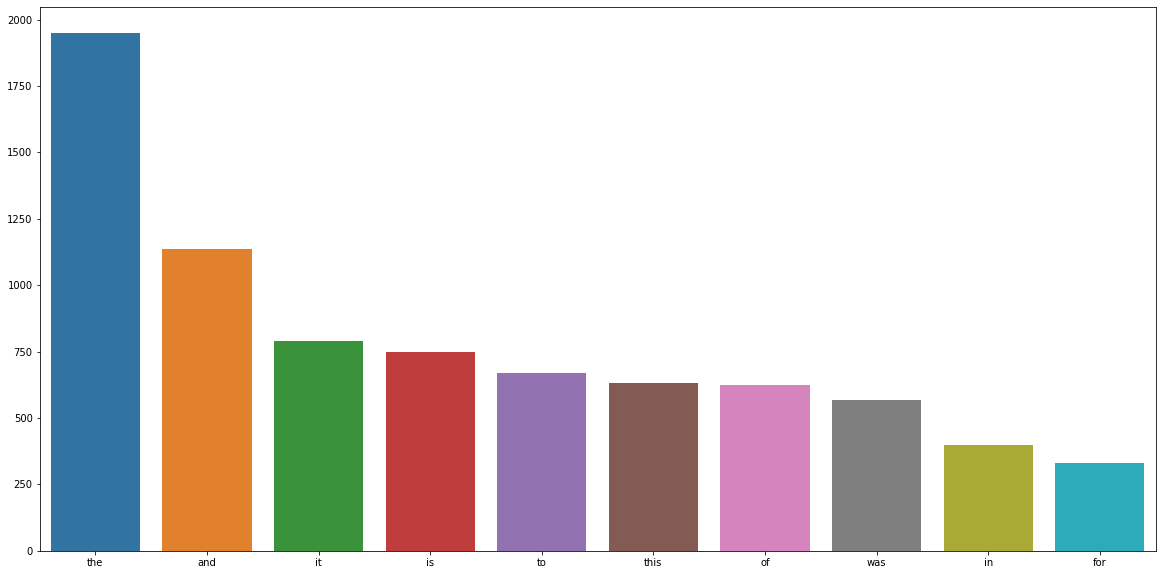

In [40]:
plt.subplots(figsize=(20, 10))
g = sns.barplot(x=feature_name[index[0:10]], 
            y=term_frequencies[index[0:10]])

In [41]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
vecterizer = CountVectorizer()
count = vecterizer.fit_transform(X.Sentences)
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(count)
tfidf_matrix = tfidf.toarray()
tfidf_matrix.shape

(2966, 5153)

In [42]:
# train by tfidf_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(tfidf_matrix, X['Labels'], test_size=0.1, random_state=1)

In [43]:
clf_1 = MultinomialNB()
clf_1.fit(x_train, y_train)
y_pred = clf_1.predict(x_test)
accuracy_score(y_test, y_pred)

0.8215488215488216

In [44]:
# train by word frequency features 
x_train2,x_test2,y_train2,y_test2 = train_test_split(count.toarray(), X['Labels'], test_size=0.1, random_state=1)

clf_2 = MultinomialNB()
clf_2.fit(x_train2, y_train2)
y_pred2 = clf_2.predict(x_test2)

accuracy_score(y_test2, y_pred2)

0.835016835016835

In [45]:
# The result shows that word frequency has a better performancae than tf-idf.
# I think tf-idf should be better, both of them is similar and it maybe a reasonable error.